## Round 2 - Problem 1.2.2 : Ravasz Agglomerative Clustering Algorithm

In [ ]:
import networkx as nx
import math
import numpy as np,numpy.random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('musae_squirrel_edges.csv')
df.rename(columns={"id1": "From", "id2": "To"},inplace=True)

In [ ]:
dataset=df.head(1000)

In [ ]:
dataset.info

<bound method DataFrame.info of      From    To
0    3475  2849
1    3475  3106
2    3475   808
3    3475  4555
4    3475  3563
..    ...   ...
995  4914  4879
996  4914  5199
997  4914  3228
998  4914  4660
999  4914  3510

[1000 rows x 2 columns]>

In [ ]:
G = nx.from_pandas_edgelist(dataset,source="From",target="To")

In [ ]:
pos = nx.spring_layout(G)

In [ ]:
len(pos)

367

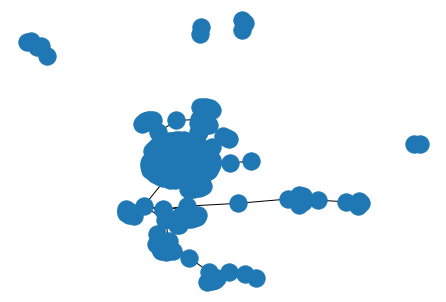

In [ ]:

nx.draw(G,pos=pos)

In [ ]:
pos

{64: array([-0.05777113, -0.08546279]),
 169: array([-0.71671786,  0.65716267]),
 313: array([ 0.32222167, -0.07200751]),
 323: array([-0.95717068,  0.16845032]),
 380: array([-0.11356771, -0.05941667]),
 390: array([-0.00550638, -0.13987895]),
 402: array([0.03965343, 0.16440398]),
 450: array([-0.0253681 , -0.08510121]),
 514: array([-0.04098196,  0.06752162]),
 573: array([ 0.46157157, -0.03088656]),
 587: array([ 0.20516303, -0.19222439]),
 613: array([-0.00227118,  0.00776236]),
 633: array([-0.02966516, -0.01944385]),
 695: array([-0.06316036,  0.14051684]),
 715: array([0.0756034 , 0.23755339]),
 737: array([-0.01602414,  0.05500224]),
 777: array([-0.01642633, -0.46071816]),
 782: array([-0.04136627,  0.0260653 ]),
 792: array([0.14956461, 0.11327951]),
 808: array([ 0.19216243, -0.26370365]),
 817: array([-0.10015194, -0.24082499]),
 912: array([-0.02226652,  0.0421169 ]),
 920: array([0.00818846, 0.13589698]),
 930: array([-0.0184359 , -0.09039275]),
 1039: array([-0.20486331

In [ ]:
 row,col=(len(pos),len(pos))
 distance = np.array([[-1]*col]*row)
 distance=distance.astype(float)

In [ ]:
coor=[]

In [ ]:
i=0
for k in pos.keys():
  coor.insert(i,pos[k])
  i=i+1


In [ ]:
for j in range(col):
  for i in range(row):
    if (i>=j):
      temp1=abs(coor[j][0]-coor[i][0]) 
      temp1=temp1*temp1
      temp2=abs(coor[j][1]-coor[i][1]) 
      temp2=temp2*temp2
      distance[i][j]=round(math.sqrt(temp1+temp2),5)

In [ ]:
distance

array([[ 0.     , -1.     , -1.     , ..., -1.     , -1.     , -1.     ],
       [ 0.05356,  0.     , -1.     , ..., -1.     , -1.     , -1.     ],
       [ 0.05835,  0.01463,  0.     , ..., -1.     , -1.     , -1.     ],
       ...,
       [ 1.04791,  1.0974 ,  1.1056 , ...,  0.     , -1.     , -1.     ],
       [ 1.05378,  1.10273,  1.11123, ...,  0.02823,  0.     , -1.     ],
       [ 1.06612,  1.11451,  1.1233 , ...,  0.05779,  0.02982,  0.     ]])

In [ ]:
vec=[]

In [ ]:
for i in range(row):
  ro=[]
  ro.append(i)
  vec.append(ro)

In [ ]:
for steps in range(0,5):
  nodes=len(vec)
  if nodes==1:
    break
  matrix=np.array([[-1]*nodes]*nodes)
  matrix=matrix.astype(float)  
  for j in range(0,nodes):
    for i in range(j,nodes):

      mini=100000.4567
      for k in range(0,len(vec[i])):
        for m in range(0,len(vec[j])):
          if distance[vec[i][k]][vec[j][m]]!=-1 and distance[vec[i][k]][vec[j][m]]<mini:
            mini=distance[vec[i][k]][vec[j][m]]
      matrix[i][j]=mini

  minim=100000.54
  x=0
  y=0
  for j in range(0,nodes):
    for i in range(0,nodes):
      if i>j and matrix[i][j]<minim:
        minim=matrix[i][j]
        x=i
        y=j
  # print(matrix)
  print(minim)
  for i in range(0,len(vec[x])):
    print((vec[x][i]+1),',',end='')
  print('-->',end='')
  for i in range(0,len(vec[y])):
    print((vec[y][i]+1),',',end='')
  print('\n')
  vecti=[]
  for i in range(nodes):
    if i==x:
      continue
    elif i==y:
      r=vec[y]
      for j in range(0,len(vec[x])):
        r.append(vec[x][j])
      vecti.append(r)
    else:
      vecti.append(vec[i])

  vec.clear()
  vec=vecti

0.00393
225 ,-->136 ,

0.00465
359 ,-->42 ,

0.0054
15 ,-->13 ,

0.00557
188 ,-->128 ,

0.00563
222 ,-->100 ,



In [ ]:
matrix

array([[ 0.  , -1.  ],
       [ 0.22, -1.  ]])